In [15]:
import pandas as pd

In [16]:
import gensim
from gensim.models import Word2Vec

In [17]:
import nltk
from nltk.tokenize import word_tokenize

In [18]:
import numpy as np

In [19]:
import time

In [20]:
# Cargar el dataset con las reseñas lematizadas
df_lemmatized = pd.read_csv("lemmatized_reviews.csv")

# Tokenización del texto
df_lemmatized["tokenized_reviews"] = df_lemmatized["Review Text Lemmatized"].apply(lambda x: word_tokenize(str(x).lower()))

# Verificar tokenización
print(df_lemmatized["tokenized_reviews"].head())

# Medir tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo Word2Vec con las reseñas
model = Word2Vec(sentences=df_lemmatized["tokenized_reviews"], vector_size=100, window=5, min_count=2, workers=4)

# Guardar el modelo entrenado
model.save("word2vec_hotel_reviews.model")

end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

# Ejemplo: Obtener el vector de la palabra "hotel"
if "hotel" in model.wv:
    print(f"Vector de 'hotel': \n{model.wv['hotel']}")

# Ejemplo: Encontrar palabras más similares a "bad"
if "bad" in model.wv:
    print(f"Palabras similares a 'bad': \n{model.wv.most_similar('bad')}")


0    [a, very, comfortable, place, ;, spacious, ;, ...
1    [the, room, be, decorate, very, beautiful, fro...
2    [the, bed, be, very, comfortable, ;, suitable,...
3    [the, attention, of, all, those, who, work, at...
4    [spectacular, attention.the, first, rooms.very...
Name: tokenized_reviews, dtype: object
Tiempo de entrenamiento: 17.79 segundos
Vector de 'hotel': 
[ 0.96717405 -1.2416544  -0.10605318 -1.0352033  -0.10017475 -1.2553759
  0.12497108 -1.9104162   0.3251329  -0.13528958  1.7577225   2.148485
 -0.8474744  -1.6236838   0.8142718   0.19088364 -0.70690596 -0.7254034
 -0.5138559  -1.0924393   0.2576268   0.7297888   0.8639497  -0.2105536
 -0.7117706   0.33929023 -2.226566    0.8089032   0.4700567  -0.44329092
 -1.1044155  -1.2636089   0.09046943  1.0941952  -1.3401841  -2.8092754
 -2.0566576  -0.4665574  -2.1126108  -0.13577524 -2.1641405   0.44813815
  2.478063    1.242086   -0.45578724 -1.1068712  -1.4145925  -1.955016
 -1.367786    0.52663267 -0.76573664 -0.3587882   

In [1]:
# Transformar las Reseñas en Vectores

In [22]:
# Cargar el modelo Word2Vec entrenado
model = gensim.models.Word2Vec.load("word2vec_hotel_reviews.model")

# Dimensión de los vectores
vector_size = model.vector_size

# Función para convertir una reseña en un vector promedio
def review_to_vector(review_tokens, model, vector_size):
    vectors = [model.wv[word] for word in review_tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)  # Si la reseña no tiene palabras en el modelo, devolver vector de ceros
    return np.mean(vectors, axis=0)

# Aplicar la función a todas las reseñas
df_lemmatized["review_vector"] = df_lemmatized["tokenized_reviews"].apply(lambda x: review_to_vector(x, model, vector_size))

# Convertir la columna de vectores a una matriz NumPy
review_vectors = np.vstack(df_lemmatized["review_vector"].values)

# Crear un nuevo DataFrame con los vectores
df_vectors = pd.DataFrame(review_vectors)
df_vectors.insert(0, "Review Id", df_lemmatized["Review Id"].values)  # Insertar id_review como primera columna

# Guardar el DataFrame en un archivo CSV
df_vectors.to_csv("review_vectors.csv", index=False)

print("Vectorización completada y guardada en 'review_vectors.csv'")

Vectorización completada y guardada en 'review_vectors.csv'


In [1]:
# Exploración de los Vectores Generados de Reseñas
# Cargar los Vectores en un DataFrame
# import pandas as pd

In [2]:
# Cargar el archivo CSV con los vectores generados
df_vectors = pd.read_csv("review_vectors.csv")

# Mostrar las primeras filas para verificar la carga
print(df_vectors.head())

# Revisar que los valores son numéricos y no hay datos faltantes.
# Revisar la cantidad de columnas debe coincidir con la dimensión del modelo Word2Vec (100).

          0         1         2         3         4         5         6  \
0  0.164926 -0.048205  0.210830 -0.081730 -0.070726  0.583146  0.226397   
1  0.377082 -0.164802 -0.250092  0.128527 -0.073145  0.302844  0.115038   
2  0.328945 -0.351850 -0.326454 -0.048409  0.211761  0.820788  0.199994   
3  0.635626 -0.767107 -0.304830  0.248653 -0.378073  0.146093  0.101697   
4 -0.052645 -0.305968 -0.169466  0.106887 -0.013922  0.457443  0.121941   

          7         8         9  ...        90        91        92        93  \
0 -0.102794  0.322014 -0.400047  ... -0.733269 -0.378365 -0.031972 -0.064744   
1  0.277872  0.745091 -0.845858  ... -0.550020 -0.406551  0.174035 -0.198740   
2 -0.636218  0.384272 -0.175841  ... -0.437322 -0.623946 -0.004983 -0.158718   
3 -0.567686  0.298795 -0.557166  ... -0.506789 -0.594881 -0.079573  0.334795   
4  0.008455  0.170338 -0.435391  ... -0.085884 -0.538831  0.411895 -0.389517   

         94        95        96        97        98        99  
0  0

In [3]:
# Obtener Información General del DataFrame
# Ver la estructura del DataFrame
df_vectors.info() # nos dice cuántas filas y columnas hay, y si hay valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41056 entries, 0 to 41055
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       41056 non-null  float64
 1   1       41056 non-null  float64
 2   2       41056 non-null  float64
 3   3       41056 non-null  float64
 4   4       41056 non-null  float64
 5   5       41056 non-null  float64
 6   6       41056 non-null  float64
 7   7       41056 non-null  float64
 8   8       41056 non-null  float64
 9   9       41056 non-null  float64
 10  10      41056 non-null  float64
 11  11      41056 non-null  float64
 12  12      41056 non-null  float64
 13  13      41056 non-null  float64
 14  14      41056 non-null  float64
 15  15      41056 non-null  float64
 16  16      41056 non-null  float64
 17  17      41056 non-null  float64
 18  18      41056 non-null  float64
 19  19      41056 non-null  float64
 20  20      41056 non-null  float64
 21  21      41056 non-null  float64
 2

In [4]:
# Ver estadísticas básicas de los vectores
print(df_vectors.describe()) # muestra el rango de valores, la media y la desviación estándar de cada dimensión del vector.

                  0             1             2             3             4  \
count  41056.000000  41056.000000  41056.000000  41056.000000  41056.000000   
mean       0.461391     -0.282568     -0.170359      0.042132     -0.060475   
std        0.164059      0.286283      0.177368      0.179409      0.189805   
min       -1.013138     -1.287396     -1.428294     -0.722966     -0.822665   
25%        0.356177     -0.486013     -0.283947     -0.073819     -0.190197   
50%        0.458871     -0.314087     -0.169685      0.049480     -0.066249   
75%        0.566384     -0.103926     -0.057683      0.165127      0.064503   
max        1.497245      1.308827      0.890431      0.862245      0.783738   

                  5             6             7             8             9  \
count  41056.000000  41056.000000  41056.000000  41056.000000  41056.000000   
mean       0.239318      0.152841     -0.194417      0.367159     -0.485186   
std        0.288708      0.238915      0.285925    

In [5]:
# Revisar si Hay Filas con Vectores de Ceros
# Si alguna reseña no contenía palabras en el vocabulario de Word2Vec, se le asignó un vector de ceros. 
# Debemos verificar cuántos casos tenemos de este tipo.
# Si hay muchas reseñas con vectores de ceros, significa que el modelo Word2Vec no cubrió bien el vocabulario.

import numpy as np

# Contar cuántos vectores son completamente ceros
zero_vectors_count = (df_vectors == 0).all(axis=1).sum()

print(f"Número de reseñas con vectores de solo ceros: {zero_vectors_count}")

Número de reseñas con vectores de solo ceros: 0


In [6]:
# Visualizar los Vectores en 2D Usando Reducción de Dimensiones
# Reducir los vectores a 2 dimensiones usando PCA (Análisis de Componentes Principales)
# o t-SNE para visualizar cómo se agrupan las reseñas.

# OPCIÓN A: PCA (Análisis de Componentes Principales)
from sklearn.decomposition import PCA

In [8]:
import matplotlib.pyplot as plt

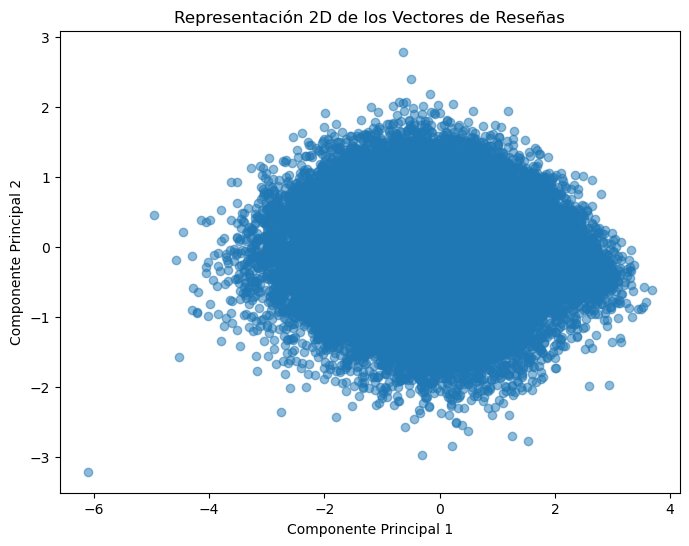

In [9]:
# Reducir los vectores a 2 dimensiones
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(df_vectors)

# Graficar los vectores en 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Representación 2D de los Vectores de Reseñas")
plt.show()

# ¿Qué revisar?
# Si los puntos están agrupados o dispersos aleatoriamente.
# Grupos de puntos pueden indicar patrones en las reseñas.

In [10]:
# OPCIÓN B: t-SNE (Más Preciso en Representación)
from sklearn.manifold import TSNE

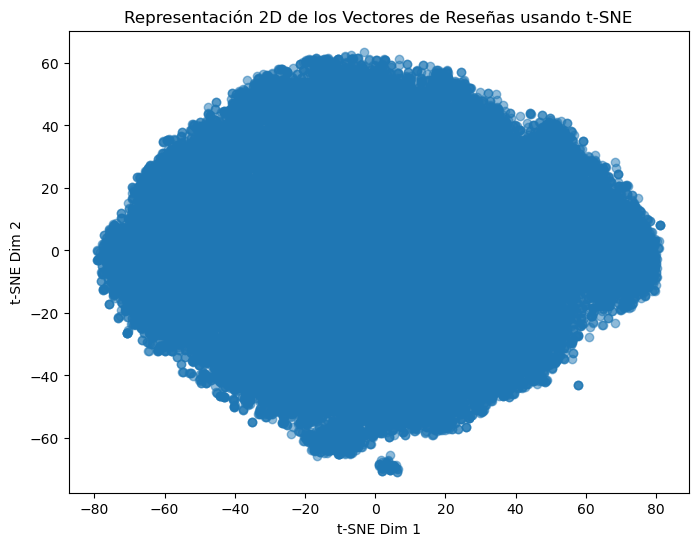

In [11]:
# Reducir a 2 dimensiones con t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_vectors = tsne.fit_transform(df_vectors)

# Graficar los vectores en 2D
plt.figure(figsize=(8, 6))
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], alpha=0.5)
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.title("Representación 2D de los Vectores de Reseñas usando t-SNE")
plt.show()


In [12]:
# Medir la Distancia Entre Reseñas
# calcular qué tan similares son dos reseñas midiendo la distancia entre sus vectores con la métrica de coseno.
from scipy.spatial.distance import cosine

In [13]:
# Seleccionar dos vectores al azar
# ¿Qué revisar?
# Valores cercanos a 1 indican reseñas muy similares.
# Valores cercanos a 0 indican reseñas diferentes.
vec1 = df_vectors.iloc[0].values
vec2 = df_vectors.iloc[1].values

# Calcular la distancia del coseno (menor valor = más similares)
similarity = 1 - cosine(vec1, vec2)

print(f"Similitud entre la reseña 1 y la reseña 2: {similarity:.4f}")

Similitud entre la reseña 1 y la reseña 2: 0.7916
